https://www.pinecone.io/learn/batch-layer-normalization/


In [ ]:
import numpy as np
import os
import time


import torch
import torch.nn as nn
import torchvision
from torchvision import transforms

from IPython.display import clear_output
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure



device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
print('Your device is: {}'.format(device))

input_shape = 28*28
num_classes = 10
input_channels = 1

def plot_train_process(train_loss, val_loss, val_accuracy):
    clear_output(True)
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))


    axes[0].set_title('Loss')
    axes[0].plot(train_loss, label='train')
    axes[0].plot(val_loss, label='validation')
    axes[0].legend()

    axes[1].set_title('Validation accuracy')
    axes[1].plot(val_accuracy)
    plt.show()

Your device is: cpu


In [ ]:

out_dict = dict()

# Technical function
def mkdir(path):
    if not os.path.exists(root_path):
        os.mkdir(root_path)
        print('Directory', path, 'is created!')
    else:
        print('Directory', path, 'already exists!')

root_path = 'fmnist'
mkdir(root_path)

download = True
train_transform = transforms.Compose([

     transforms.ToTensor(),
 ])


test_transform = transforms.Compose([
                                       transforms.ToTensor()])


fmnist_dataset_train = torchvision.datasets.FashionMNIST(root_path,
                                                        train=True,
                                                        transform=train_transform,
                                                        target_transform=None,
                                                        download=download)
fmnist_dataset_test = torchvision.datasets.FashionMNIST(root_path,
                                                       train=False,
                                                       transform=test_transform,
                                                       target_transform=None,
                                                       download=download)



Directory fmnist is created!


100%|██████████| 26421880/26421880 [00:01<00:00, 19647058.91it/s]


Extracting fmnist/FashionMNIST/raw/train-images-idx3-ubyte.gz to fmnist/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 341824.68it/s]


Extracting fmnist/FashionMNIST/raw/train-labels-idx1-ubyte.gz to fmnist/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 6122699.36it/s]


Extracting fmnist/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to fmnist/FashionMNIST/raw



In [ ]:
train_loader = torch.utils.data.DataLoader(...,
                                           batch_size=...,
                                           shuffle=True,
                                           num_workers=2)
test_loader = torch.utils.data.DataLoader(...,
                                          batch_size=...,
                                          shuffle=False,
                                          num_workers=2)

In [ ]:
model = nn.Sequential(
    nn.Flatten(), # This layer converts image into a vector to use Linear layers afterwards
    nn.Linear(...),# Linear layer
    nn.ReLU(), #activation layer
    ...


).to(device)


# do not change the code in the block below
# __________start of block__________
opt = torch.optim....
loss_func = nn.CrossEntropyLoss()
# __________end of block__________

In [ ]:
# do not change the code in the block below
# __________start of block__________
def train_model(model, train_loader, val_loader, loss_fn, opt, n_epochs: int, build_plot=True):
    train_loss = []
    val_loss = []
    val_accuracy = []


    for epoch in range(n_epochs):
        ep_train_loss = []
        ep_val_loss = []
        ep_val_accuracy = []
        start_time = time.time()

        model.train(True)
        for X_batch, y_batch in train_loader:

            #zero grad


            # to device
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)

            #get predictions
            predictions = ....
            #compute loss
            loss = ...
            #backward step

            # optimizer step


            ep_train_loss.append(loss.item())

        model.train(False)
        model.eval()
        with torch.no_grad():
            for X_batch, y_batch in val_loader:

                X_batch = X_batch.to(device)
                y_batch = y_batch.to(device)

                predictions = model(X_batch)
                loss = loss_func(predictions, y_batch)

                ep_val_loss.append(loss.item())
                y_pred = predictions.max(1)[1].data
                ep_val_accuracy.append(np.mean((y_batch.cpu() == y_pred.cpu()).numpy()))

        train_loss.append(np.mean(ep_train_loss))
        val_loss.append(np.mean(ep_val_loss))
        val_accuracy.append(np.mean(ep_val_accuracy))

        if build_plot:
            plot_train_process(train_loss, val_loss, val_accuracy)
    return train_loss, val_loss, val_accuracy
# __________end of block__________

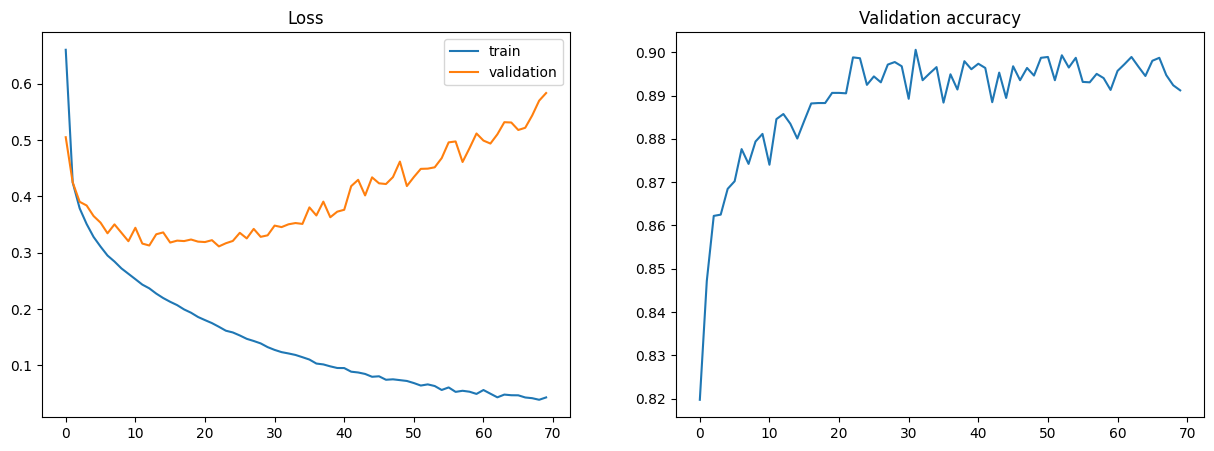

In [ ]:
n_epochs_1 = 70

train_loss, val_loss, val_accuracy = train_model(
    model,
    train_loader,
    test_loader,
    loss_func,
    opt,
    n_epochs_1
)

# BATCH NORM

If you proceed to train your model on such datasets with input features on different scales, you’ll notice that the neural network takes significantly longer to train because the gradient descent algorithm takes longer to converge when the input features are not all on the same scale. Additionally, such high values can also propagate through the layers of the network leading to the accumulation of large error gradients that make the training process unstable, called the problem of exploding gradients.

Normalizes data across batch dimension, i.e. for each feature it calculates the mean and variance  across al instances in a batch

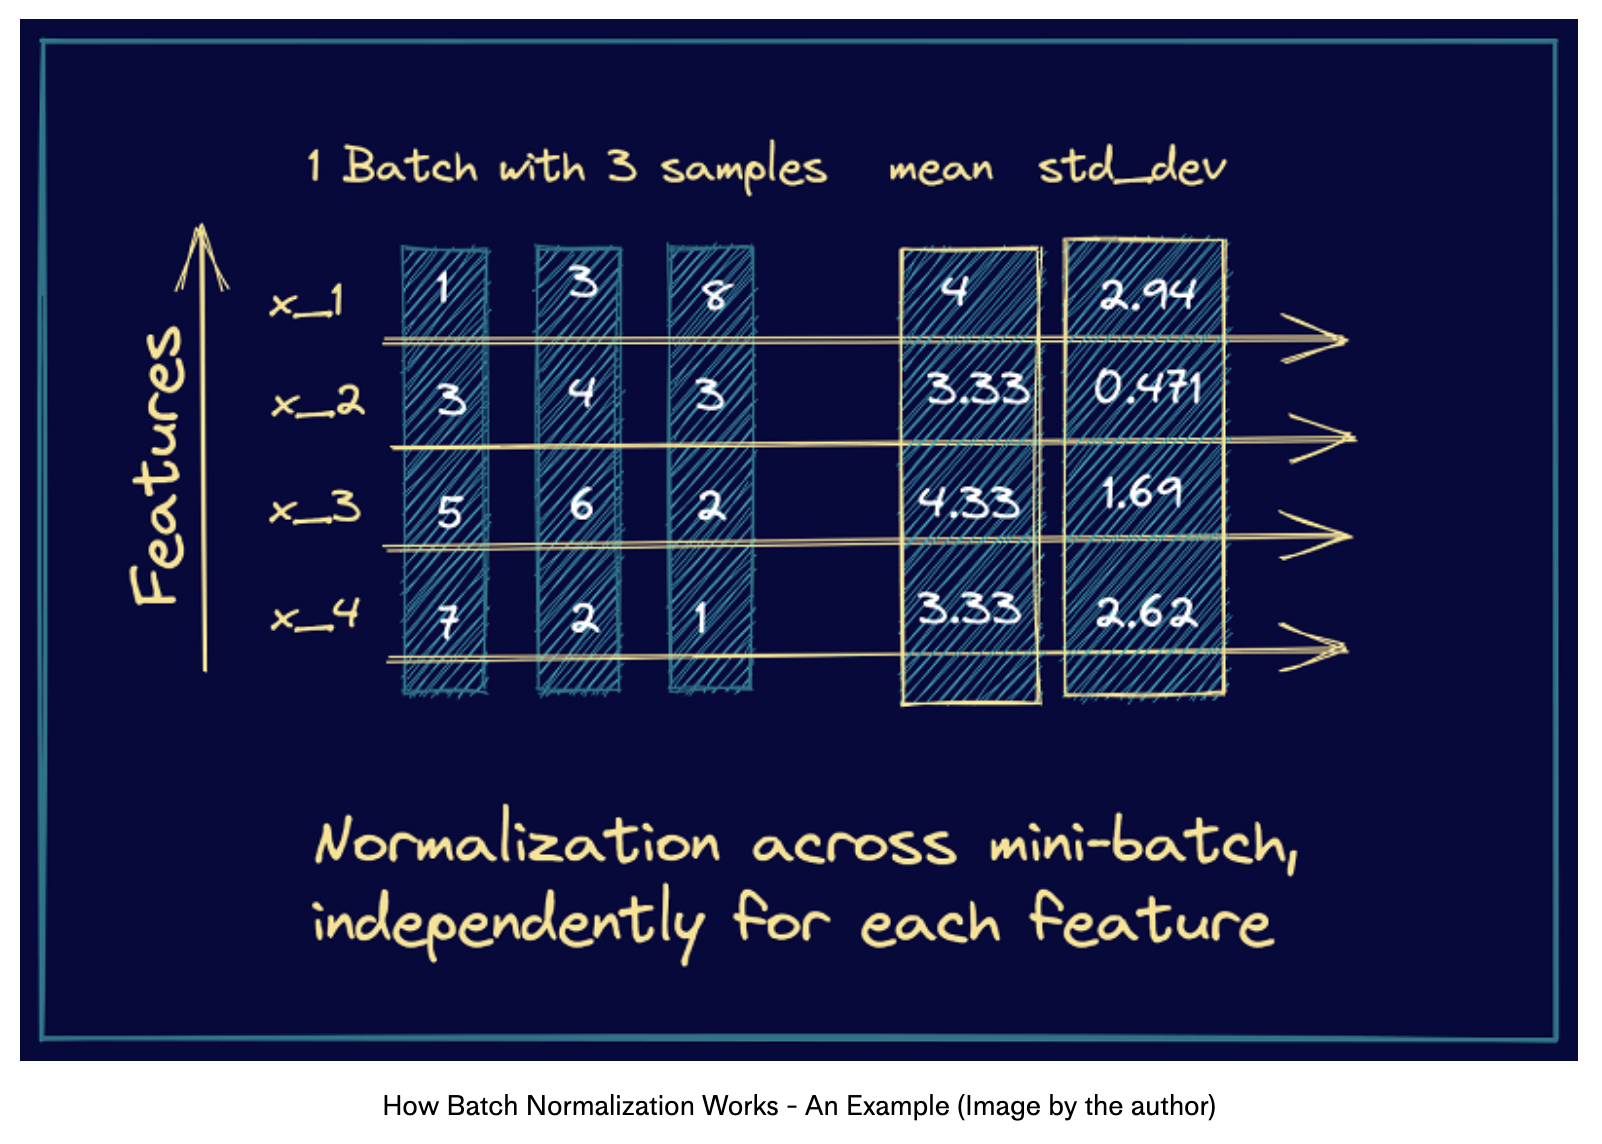

In [ ]:
model_bn = nn.Sequential(
    nn.Flatten(), # This layer converts image into a vector to use Linear layers afterwards
    nn.Linear(...),# Linear layer
    nn.ReLU(), #activation layer
    ...
    nn.BatchNorm1d(input_shape), #Insert BatchNorm into your architecture
    ...

).to(device)

opt_bn = torch.optim. ...
loss_func_bn = nn.CrossEntropyLoss()

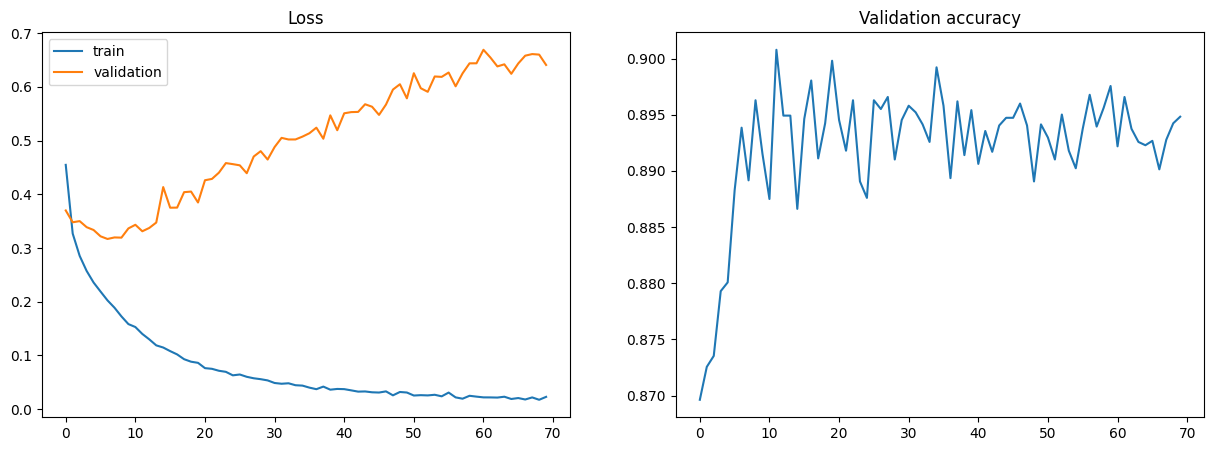

In [ ]:
n_epochs_1 = 70

train_loss, val_loss, val_accuracy = train_model(
    model_bn,
    train_loader,
    test_loader,
    loss_func_bn,
    opt_bn,
    n_epochs_1
)

# LAYER NORM


Calculates the mean and the varience dor each instance separately all overthe features

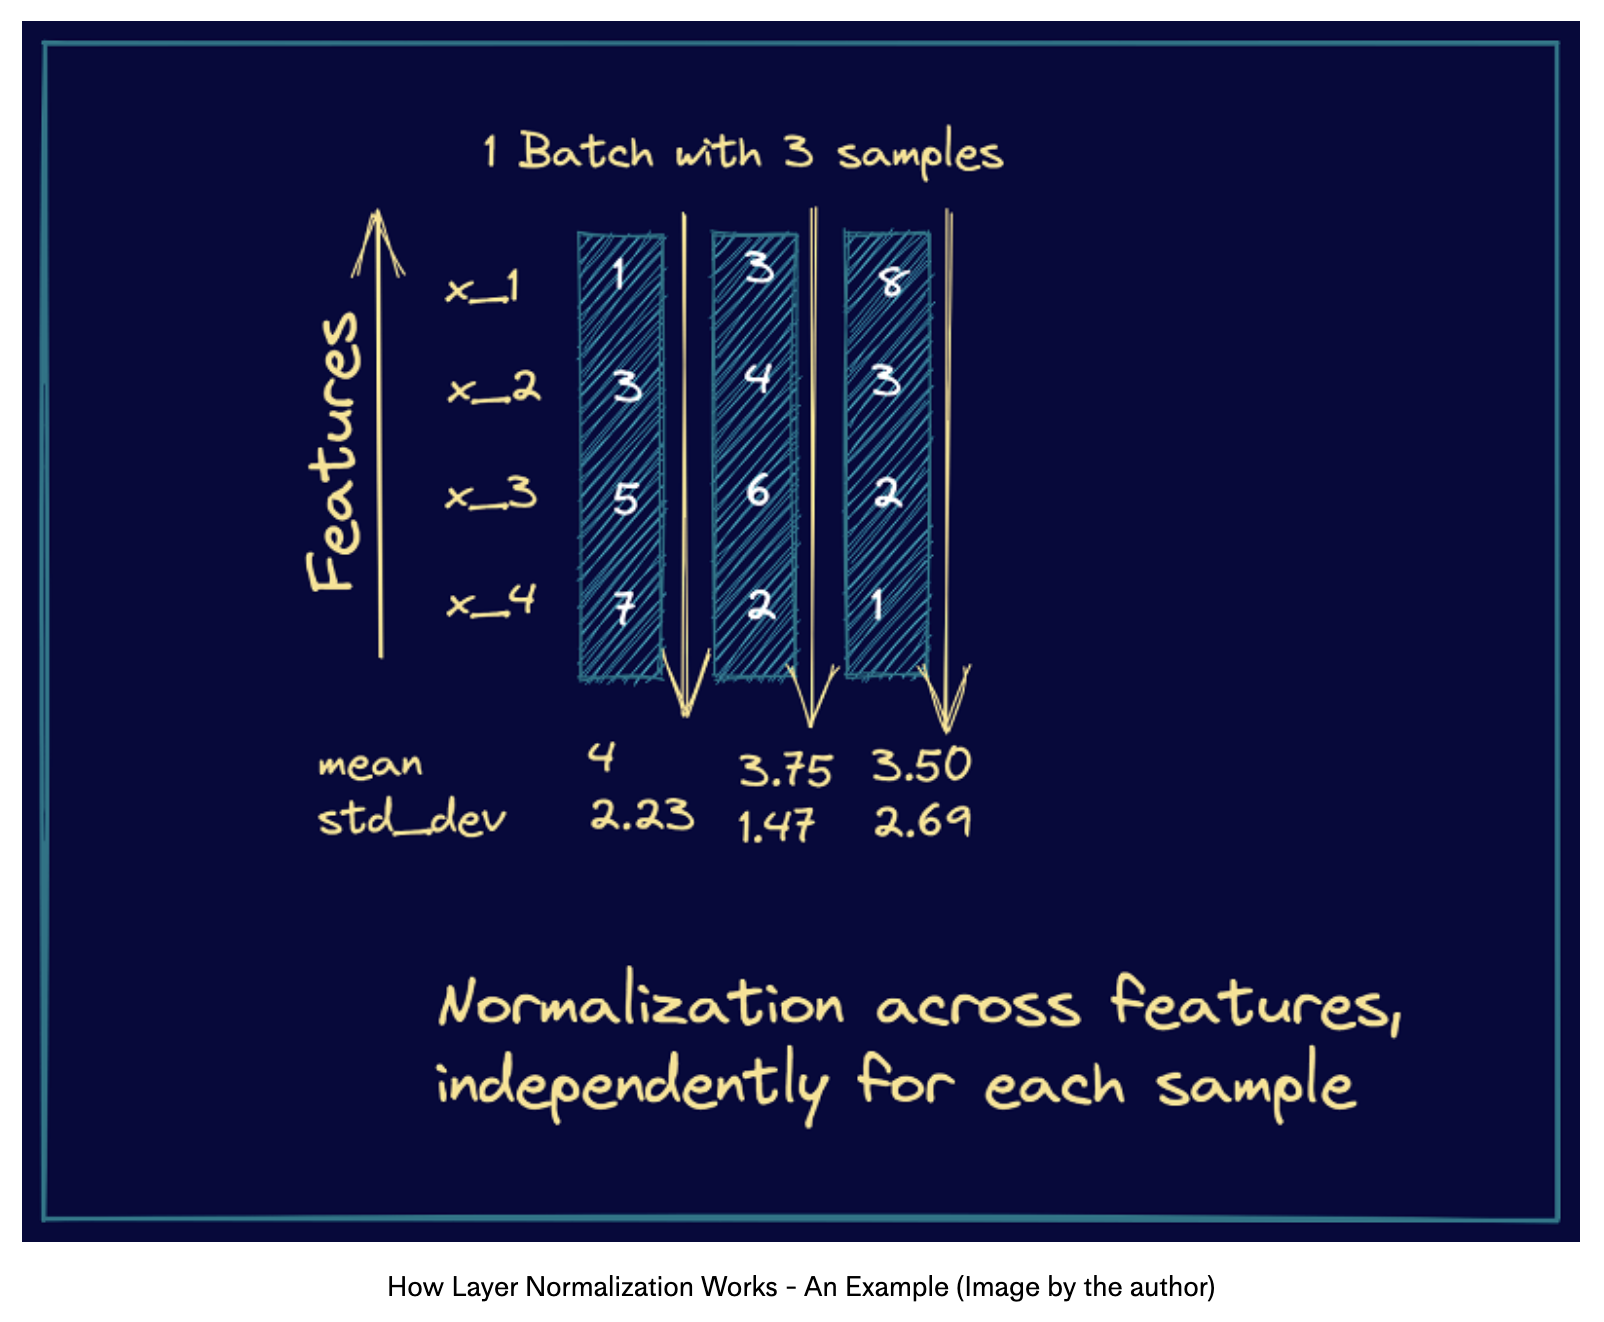

In [ ]:
model_ln = nn.Sequential(
    nn.Flatten(), # This layer converts image into a vector to use Linear layers afterwards
    nn.Linear(...),# Linear layer
    nn.ReLU(), #activation layer...),
    nn.LayerNorm(input_shape//2), # Insert layer norm
    ....

).to(device)

opt_ln = torch.optim. ...
loss_func_ln = nn.CrossEntropyLoss()

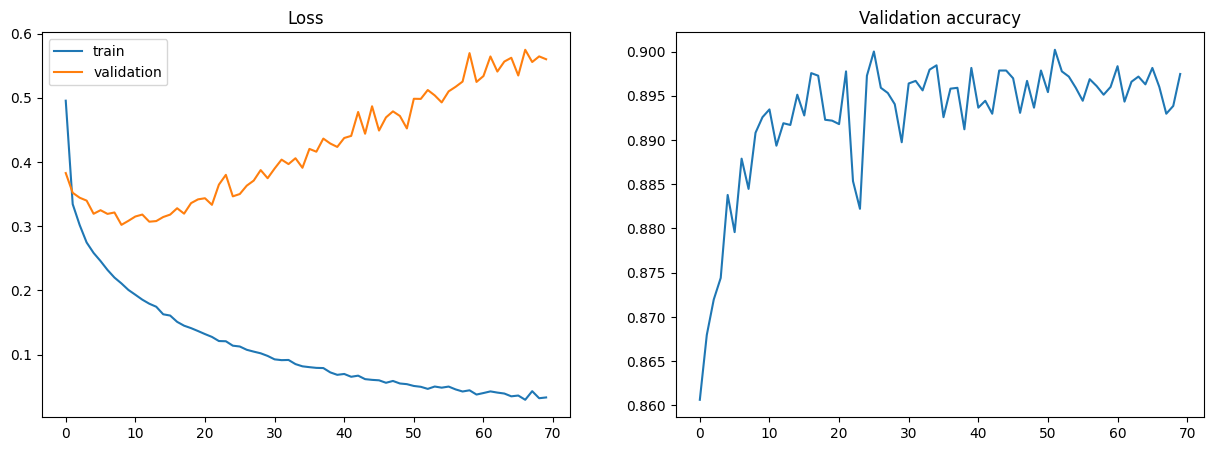

In [ ]:
n_epochs_1 = 70

train_loss, val_loss, val_accuracy = train_model(
    model_ln,
    train_loader,
    test_loader,
    loss_func_ln,
    opt_ln,
    n_epochs_1)

#REGULARIZATION
## DROPOUT

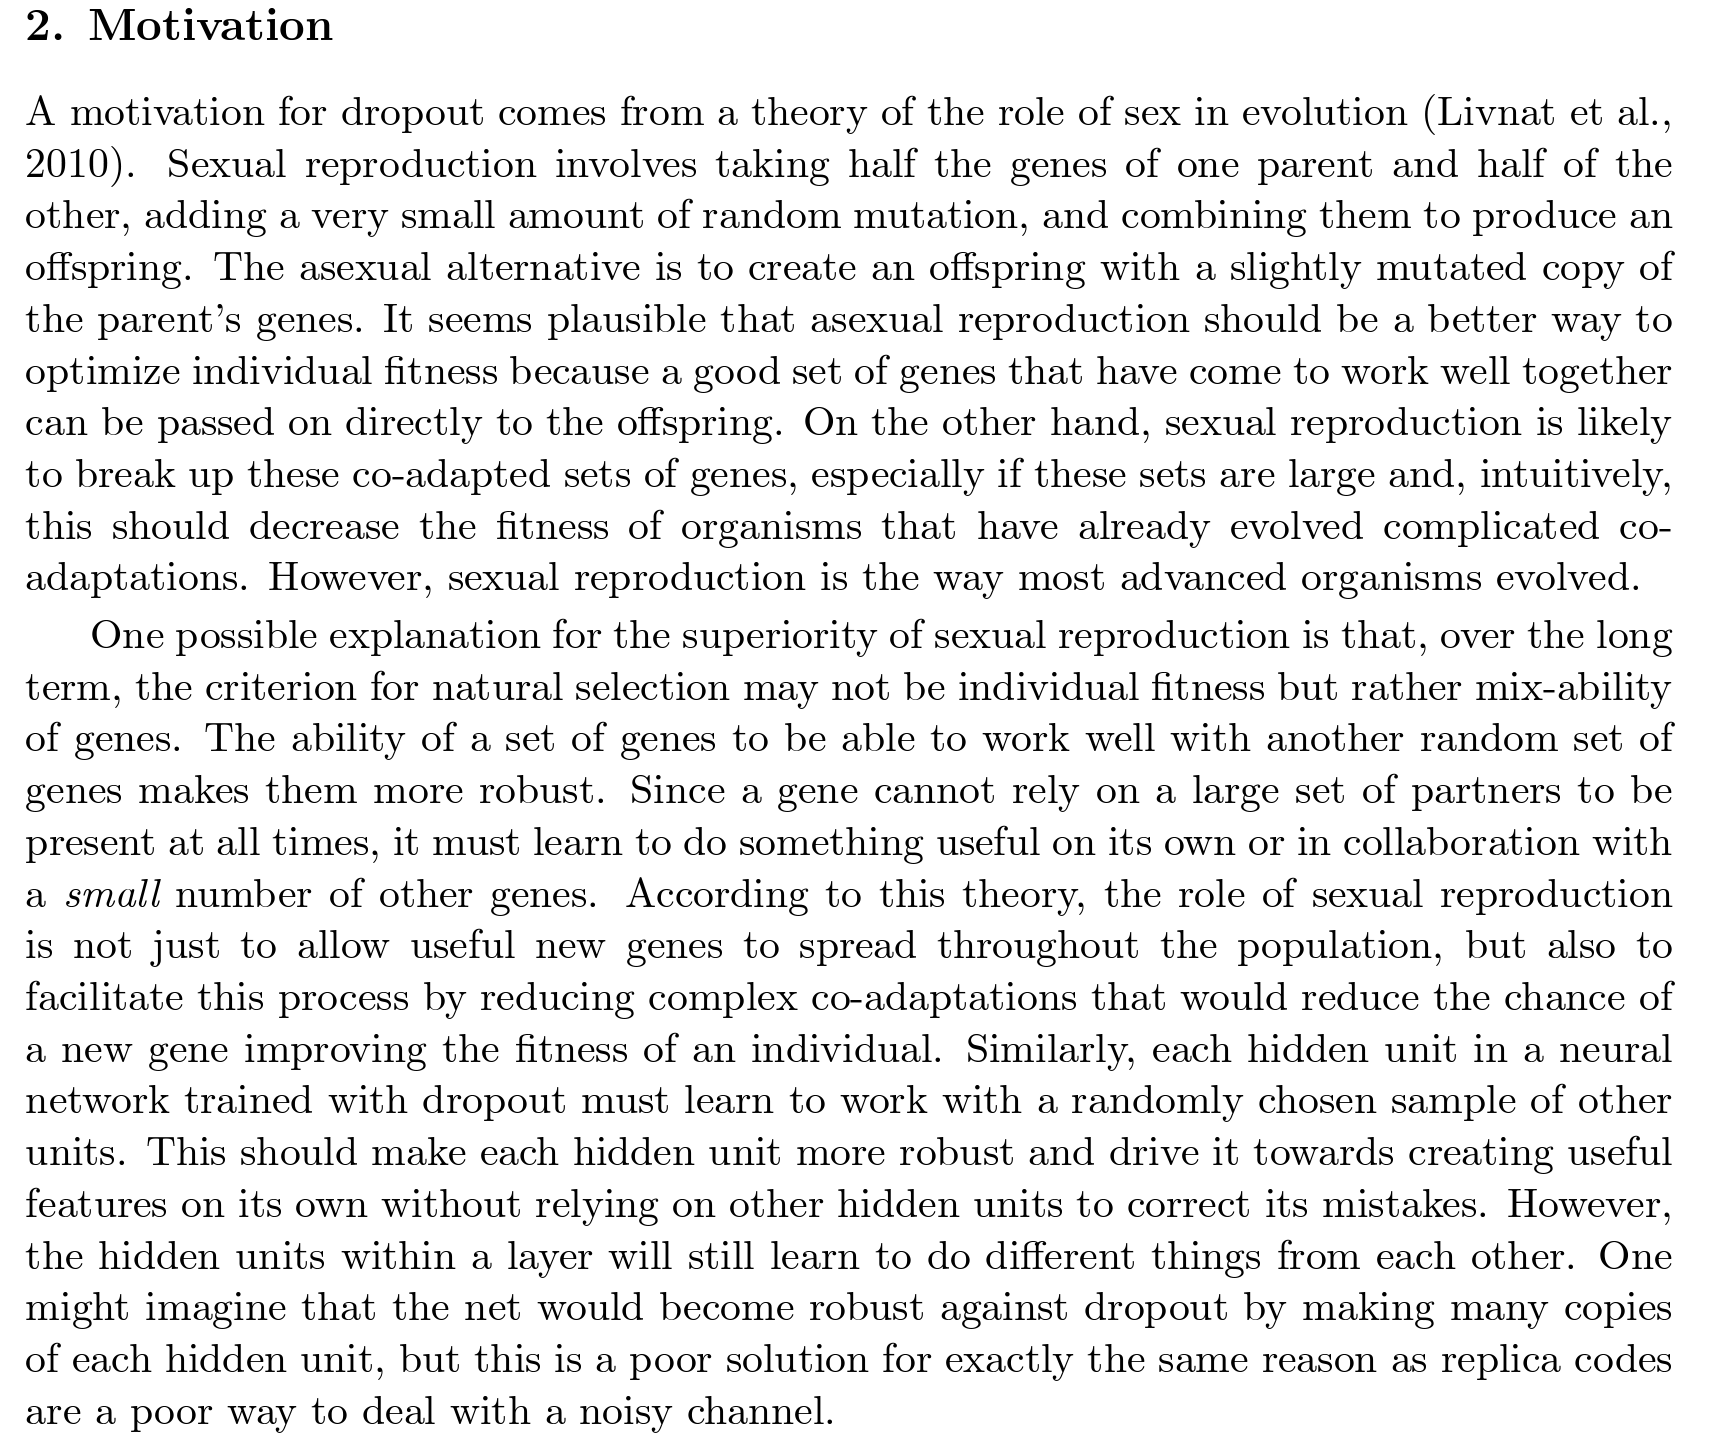

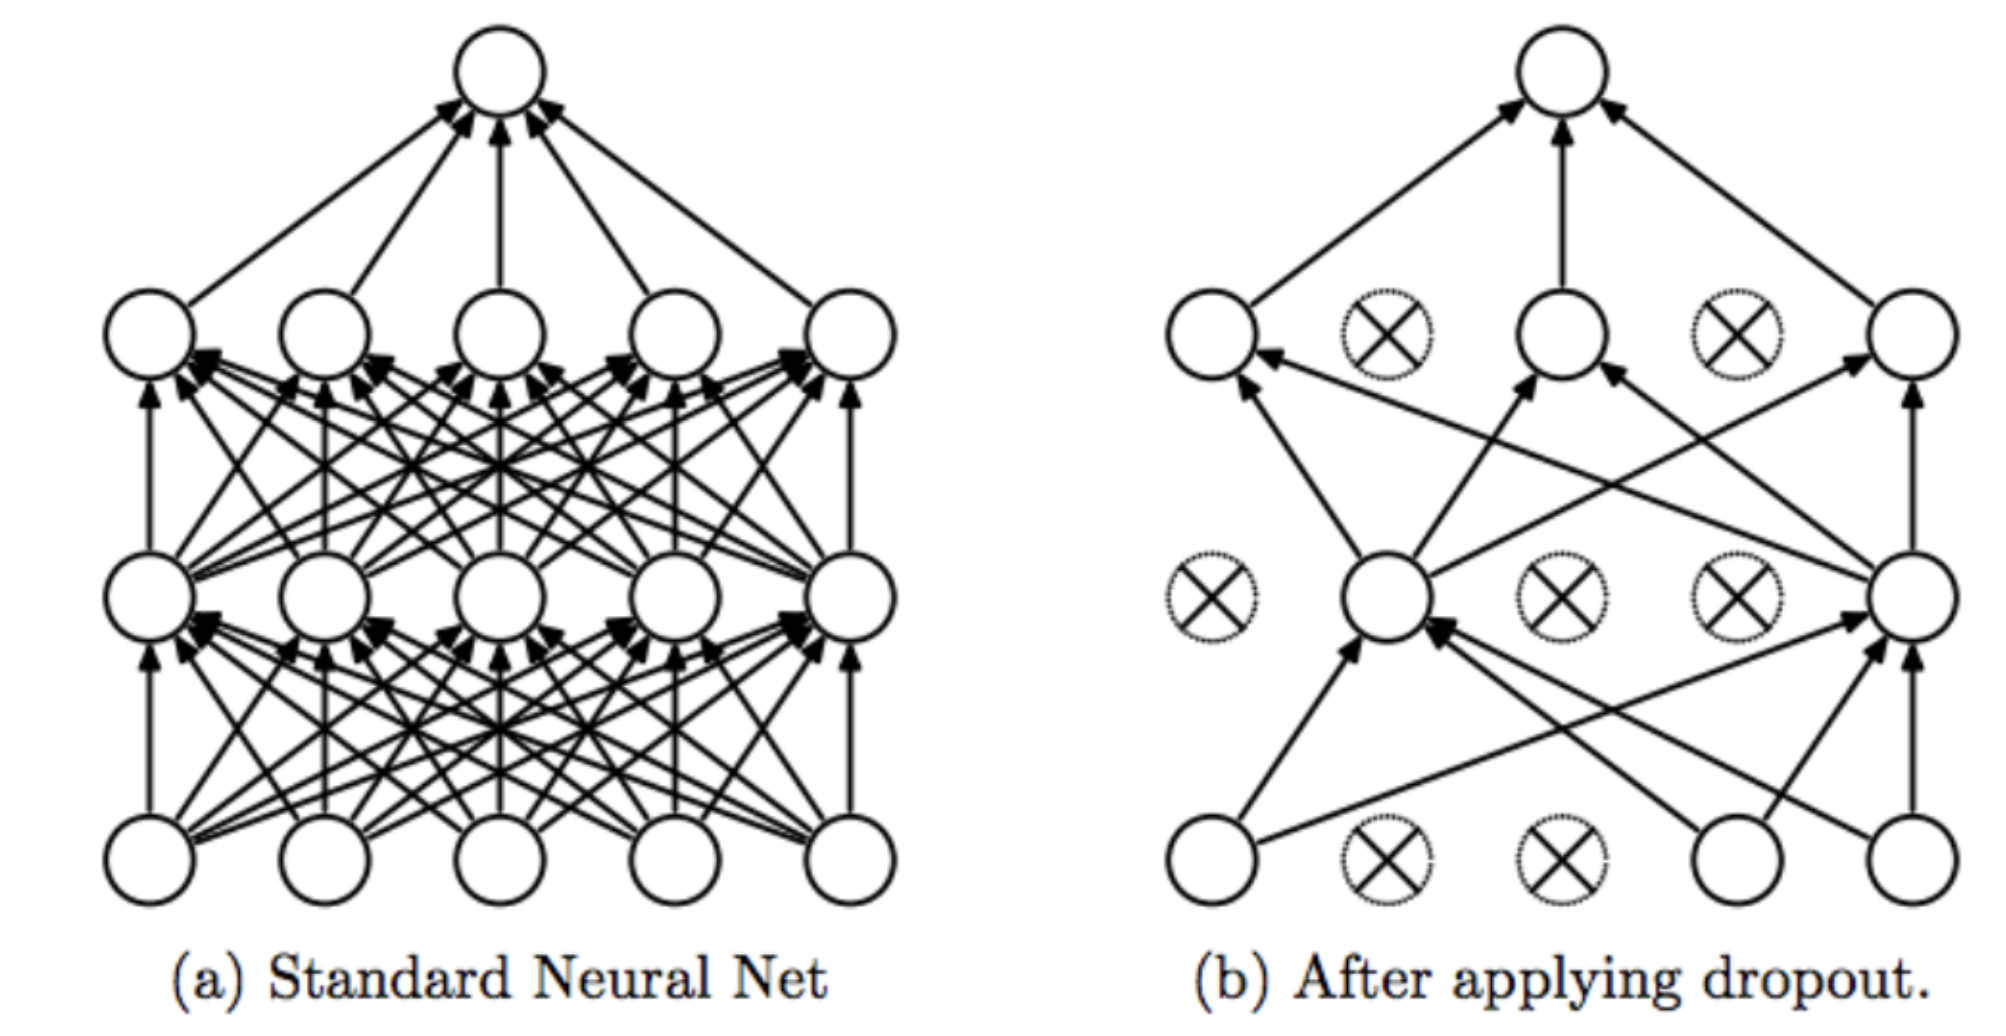

p - probability to turn off nueron

In [ ]:
model_do = nn.Sequential(
    nnn.Flatten(), # This layer converts image into a vector to use Linear layers afterwards
    nn.Linear(...),# Linear layer
    nn.ReLU(), #activation layer,
    nn.Dropout(), # Insert DropOut
    ...
    nn.Linear( input_shape//4, num_classes),

).to(device)

opt_do = torch.optim.Adam(model_do.parameters(), lr=3e-4)
loss_func_do = nn.CrossEntropyLoss()

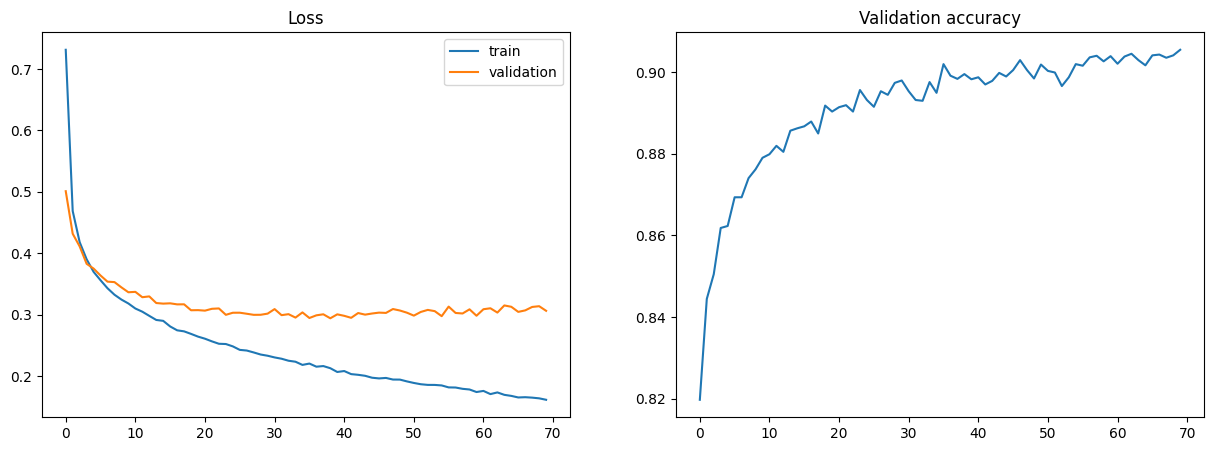

In [ ]:
n_epochs_1 = 70

train_loss, val_loss, val_accuracy = train_model(
    model_do,
    train_loader,
    test_loader,
    loss_func_do,
    opt_do,
    n_epochs_1
)

Linear(in_features=784, out_features=392, bias=True)

In [ ]:
model_do_bn = nn.Sequential(
    #Insert BatchNorm and DropOut

).to(device)

opt_do_bn = torch.optim.Adam(model_do_bn.parameters(), lr=3e-4)
loss_func_do_bn = nn.CrossEntropyLoss()

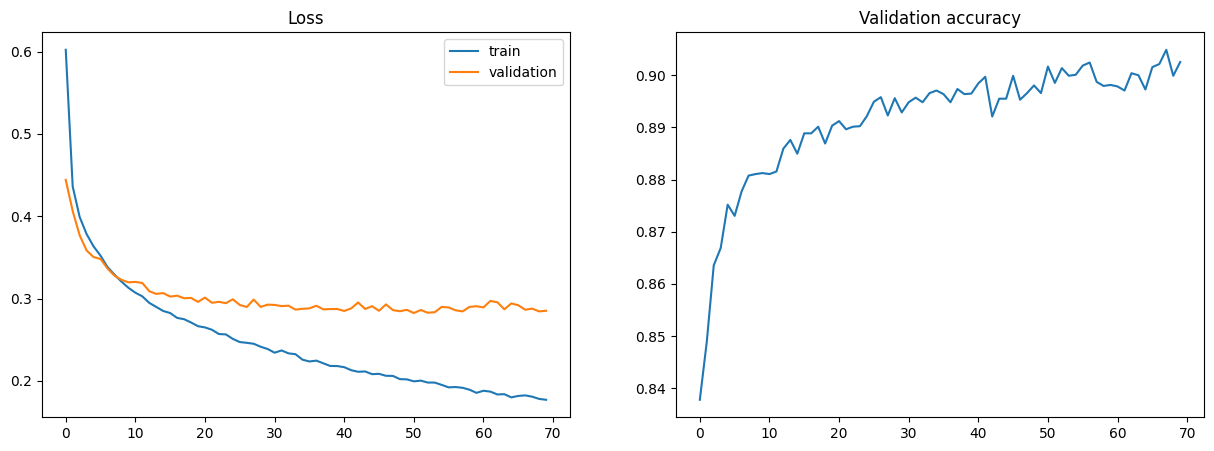

In [ ]:
n_epochs_1 = 70

train_loss, val_loss, val_accuracy = train_model(
    model_do_bn,
    train_loader,
    test_loader,
    loss_func_do_bn,
    opt_do_bn,
    n_epochs_1
)

## L2 REGULARIZATION

In [ ]:
class MLP_model(nn.Module):
  '''
    Multilayer Perceptron.
  '''
  def __init__(self, input_shape):
    super().__init__()
    self.layers = nn.Sequential(
      # Implement your own architecture
      ...
    )





  def forward(self, x):
    '''Forward pass'''
    return ...

  def compute_l2_loss(self, w):
      return #compute l2 loss

  def compute_l1_loss(self, w):
      return # compute l1 loss

In [ ]:

def train_reg(model, train_loader, val_loader, loss_fn, opt, reg,n_epochs: int, build_plot=True):
    train_loss = []
    val_loss = []
    val_accuracy = []


    for epoch in range(n_epochs):
        ep_train_loss = []
        ep_val_loss = []
        ep_val_accuracy = []
        start_time = time.time()

        model.train(True)
        for X_batch, y_batch in train_loader:
          #zero grad
            opt.zero_grad()

            # to device
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)

            predictions = model(X_batch)
            loss =loss_func(predictions, y_batch)

            if reg == 'l1':

              # coefficient of l1 regularization
              l1_weight = 0....
              l1_parameters = []

              #collect  vectorized model parameters. (use parameter.view(-1))
              for parameter in model.parameters():
                  l1_parameters.append(...)

              # multiply your regularization and coefficient. Use torch.cat to concatenate the parameters
              l1 = l1_weight * model.compute_l1_loss(...)

              loss += l1.to(device)

            if reg == 'l2':

              # coefficient of l2 regularization
              l2_weight = 0.001
              l2_parameters = []

              for parameter in model.parameters():
                #collect  vectorized model parameters. (use parameter.view(-1))
                  l2_parameters.append(...)

              # multiply your regularization and coefficient. Use torch.cat to concatenate the parameters
              l2 = l2_weight * model.compute_l2_loss(t)
              loss += l2
            #back step
            loss.backward()
            # optimizer step
            opt.step()

            ep_train_loss.append(loss.item())

        model.train(False)
        model.eval()
        with torch.no_grad():
            for X_batch, y_batch in val_loader:

                X_batch = X_batch.to(device)
                y_batch = y_batch.to(device)

                predictions = model(X_batch)
                loss = loss_func(predictions, y_batch)

                ep_val_loss.append(loss.item())
                y_pred = predictions.max(1)[1].data
                ep_val_accuracy.append(np.mean((y_batch.cpu() == y_pred.cpu()).numpy()))

        train_loss.append(np.mean(ep_train_loss))
        val_loss.append(np.mean(ep_val_loss))
        val_accuracy.append(np.mean(ep_val_accuracy))

        if build_plot:
            plot_train_process(train_loss, val_loss, val_accuracy)
    return train_loss, val_loss, val_accuracy
# __________end of block__________

In [ ]:
model_l1 = MLP_model(input_shape).to(device)

opt_l1 = torch.optim.Adam(model_l1.parameters(), lr=3e-4)
loss_func_l1 = nn.CrossEntropyLoss()

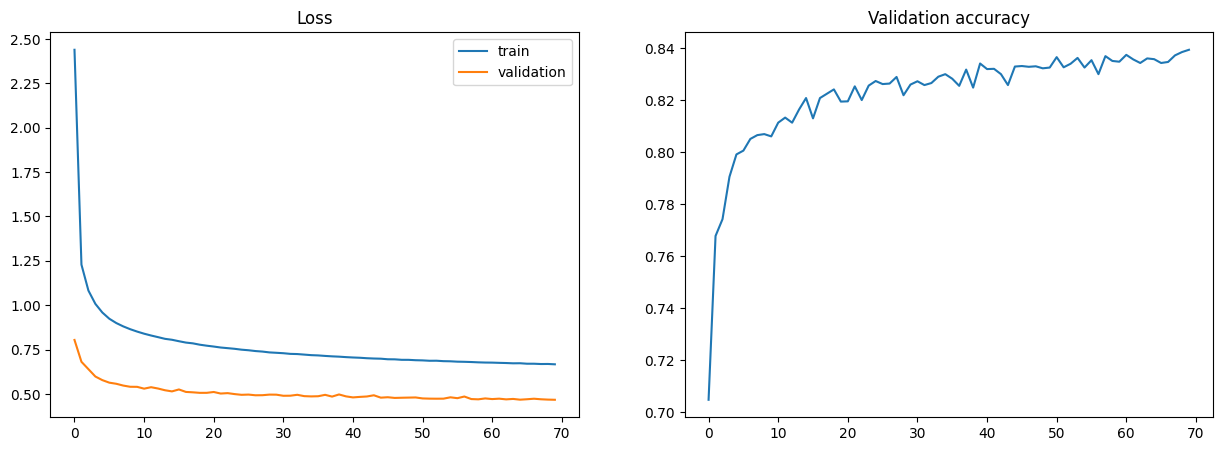

In [ ]:
n_epochs_1 = 70

train_loss, val_loss, val_accuracy = train_reg(
    model_l1,
    train_loader,
    test_loader,
    loss_func_l1,
    opt_l1,
    'l1',
    n_epochs_1,

)

In [ ]:
import matplotlib.pyplot as plt



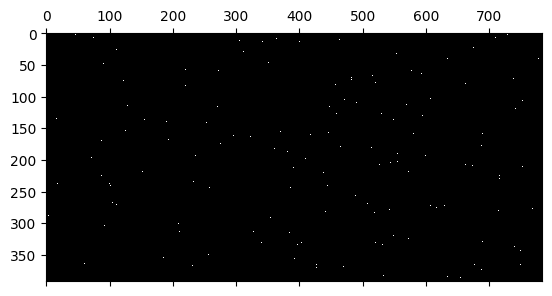

In [ ]:

plt.spy(model[1].weight.detach().cpu().numpy(), precision=1e-4)

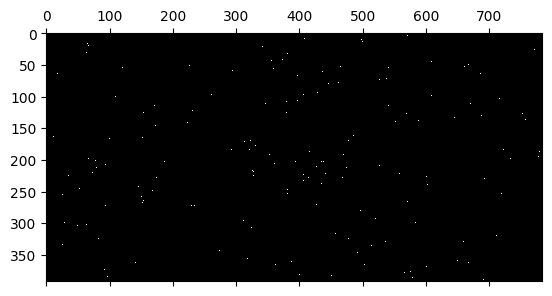

In [ ]:

plt.spy(model_do[1].weight.detach().cpu().numpy(), precision=1e-4)

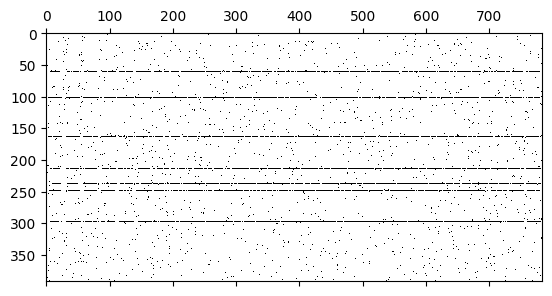

In [ ]:
plt.spy(model_l1.layers[1].weight.detach().cpu().numpy(), precision=1e-4)

In [ ]:
model_l2 = MLP_model(input_shape).to(device)

opt_l2 = torch.optim.Adam(model_l2.parameters(), lr=3e-4)
loss_func_l2 = nn.CrossEntropyLoss()

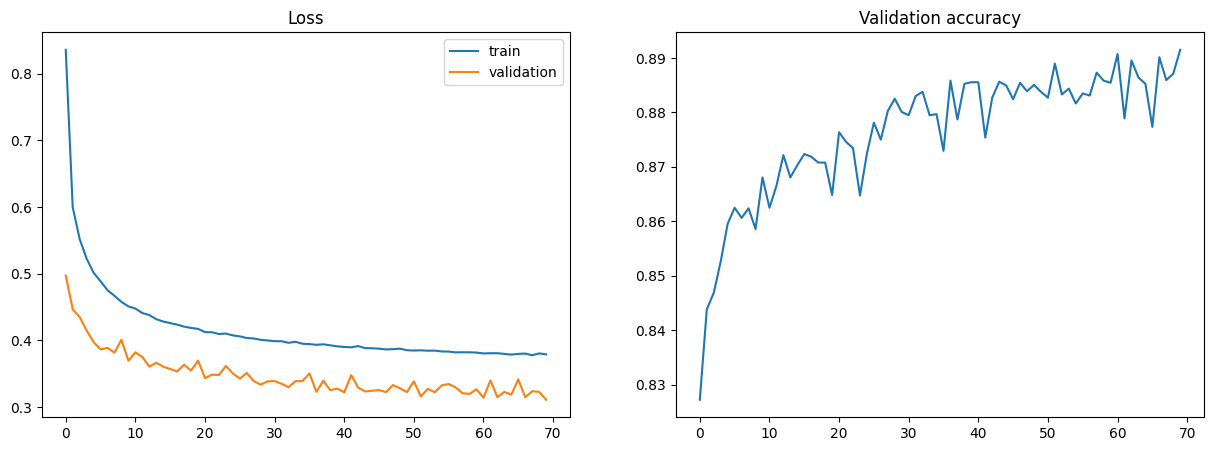

In [ ]:
n_epochs_1 = 70

train_loss, val_loss, val_accuracy = train_reg(
    model_l2,
    train_loader,
    test_loader,
    loss_func_l2,
    opt_l2,
    'l2',
    n_epochs_1,

)

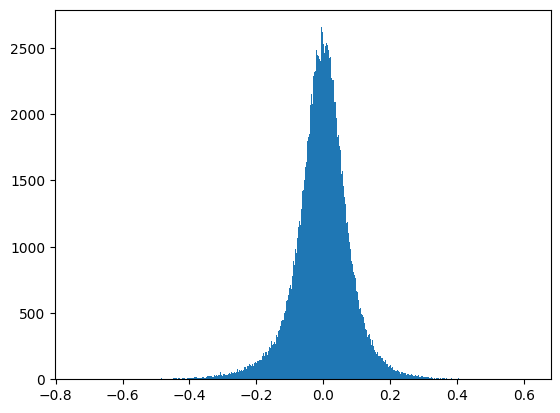

In [ ]:
plt.hist(model[1].weight.detach().cpu().numpy().reshape(1, -1)[0], bins = 1000);

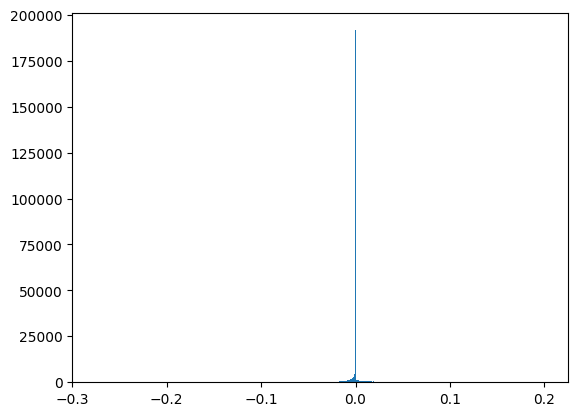

In [ ]:
plt.hist(model_l2.layers[1].weight.detach().cpu().numpy().reshape(1, -1)[0], bins = 1000);